In [1]:
import numpy as np
import pandas as pd

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [ ]:
# Download Dataset from https://www.dropbox.com/scl/fi/v7c1c8a3cnncuv1fo28es/Wages.xlsx?rlkey=vli12nwph687hvn9jskgf73a1&st=s862pfm6&dl=1
# and add it to colab

In [12]:
# wagesDf = pd.read_excel("./Wages.xlsx")
wagesDf = pd.read_excel("https://www.dropbox.com/scl/fi/v7c1c8a3cnncuv1fo28es/Wages.xlsx?rlkey=vli12nwph687hvn9jskgf73a1&st=s862pfm6&dl=1")

In [13]:
wagesDf

,Wage,Educ,Age
0,17.54,12,76
1,20.93,10,61
2,12.94,8,75
3,19.34,6,38
4,24.12,12,59
...,...,...,...
75,25.64,14,74
76,38.77,21,41
77,21.87,15,75
78,27.54,20,46


In [14]:
wagesDf.size

240

In [15]:
wagesDf.describe()

,Wage,Educ,Age
count,80.000000,80.000000,80.000000
mean,24.930500,13.850000,49.487500
std,7.479982,4.016107,17.213473
min,6.930000,6.000000,18.000000
25%,19.145000,10.000000,34.750000
50%,24.980000,14.000000,51.000000
75%,30.572500,17.000000,65.250000
max,43.440000,22.000000,77.000000


In [16]:
wagesDf.shape

(80, 3)

In [17]:
import matplotlib.pyplot as plt

In [18]:
# Plotting
fig1 = plt.figure(
  figsize=(8, 8)
)

<Figure size 800x800 with 0 Axes>

In [19]:
wagesDf['agePower2'] = wagesDf.apply(lambda row: row['Age'] * row['Age'], axis=1)
wagesDf

,Wage,Educ,Age,agePower2
0,17.54,12,76,5776.0
1,20.93,10,61,3721.0
2,12.94,8,75,5625.0
3,19.34,6,38,1444.0
4,24.12,12,59,3481.0
...,...,...,...,...
75,25.64,14,74,5476.0
76,38.77,21,41,1681.0
77,21.87,15,75,5625.0
78,27.54,20,46,2116.0


In [ ]:
wagesDf = wagesDf.sort_values(by="Age")

In [ ]:
wageAgeModel2 = sm.OLS(
  wagesDf["Wage"],
  sm.add_constant(wagesDf[["Age", "agePower2"]])
)
wageAgeModel2Fit = wageAgeModel2.fit()
print(wageAgeModel2Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     25.72
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.79e-09
Time:                        14:55:41   Log-Likelihood:                -253.53
No. Observations:                  80   AIC:                             513.1
Df Residuals:                      77   BIC:                             520.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4664      5.569     -2.598      0.0

In [ ]:
wageAgeModel2Fit.params

const       -14.466357
Age           1.756677
agePower2    -0.017339
dtype: float64

In [ ]:
predictedWage3 = wageAgeModel2Fit.predict(sm.add_constant(wagesDf[["Age", "agePower2"]]))
wagesDf['predictedWage3'] = predictedWage3
wagesDf

,Wage,Educ,Age,agePower2,predictedWage3
0,17.54,12,76,5776.0,18.891302
1,20.93,10,61,3721.0,28.172691
2,12.94,8,75,5625.0,19.752807
3,19.34,6,38,1444.0,27.249913
4,24.12,12,59,3481.0,28.820685
...,...,...,...,...,...
75,25.64,14,74,5476.0,20.579633
76,38.77,21,41,1681.0,28.410612
77,21.87,15,75,5625.0,19.752807
78,27.54,20,46,2116.0,29.651553


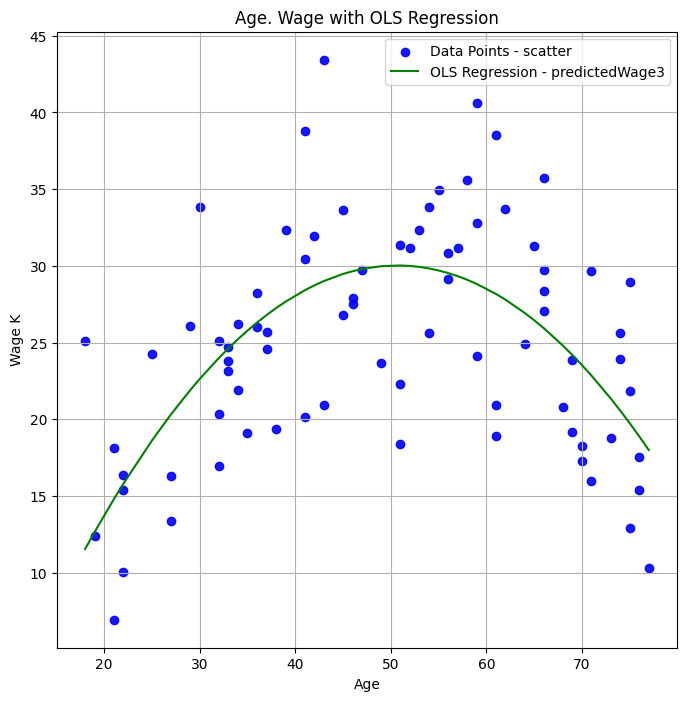

In [ ]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Age"],
  wagesDf["predictedWage3"],
  color='green',
  label='OLS Regression - predictedWage3'
)
plt.title('Age. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [ ]:
wagesDf

,Wage,Educ,Age,agePower2,predictedWage3
69,25.13,16,18,324.0,11.536003
27,12.39,13,19,361.0,12.651138
62,6.93,6,21,441.0,14.777375
60,18.11,14,21,441.0,14.777375
28,16.37,12,22,484.0,15.788477
...,...,...,...,...,...
48,28.95,20,75,5625.0,19.752807
77,21.87,15,75,5625.0,19.752807
67,15.38,12,76,5776.0,18.891302
0,17.54,12,76,5776.0,18.891302


In [ ]:
# Extract coefficients
coefficients = wageAgeModel2Fit.params
intercept = coefficients['const']
slope_age = coefficients['Age']
slope_age2 = coefficients['agePower2']

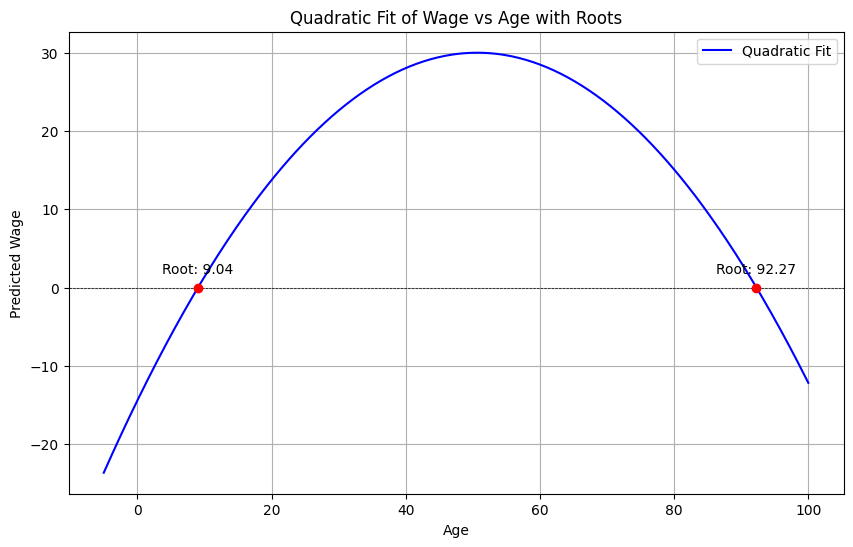

The roots of the quadratic equation are: [9.042055881204288, 92.27185466166878]


In [ ]:


# Solve the quadratic equation
a = slope_age2
b = slope_age
c = intercept

# Calculate the discriminant
discriminant = b**2 - 4*a*c

if discriminant >= 0:
    root1 = (-b + np.sqrt(discriminant)) / (2*a)
    root2 = (-b - np.sqrt(discriminant)) / (2*a)
    roots = [root1, root2]
else:
    roots = []

# Plotting the quadratic curve and the roots
age_values = np.linspace(-5, 100, 400)
wage_predictions = intercept + slope_age * age_values + slope_age2 * (age_values**2)

plt.figure(figsize=(10, 6))
plt.plot(age_values, wage_predictions, label='Quadratic Fit', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

if roots:
    for root in roots:
        plt.plot(root, 0, 'ro')  # Plot the roots on the curve
        plt.annotate(f'Root: {root:.2f}', (root, 0), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Age')
plt.ylabel('Predicted Wage')
plt.title('Quadratic Fit of Wage vs Age with Roots')
plt.legend()
plt.grid(True)
plt.show()

print(f"The roots of the quadratic equation are: {roots}")


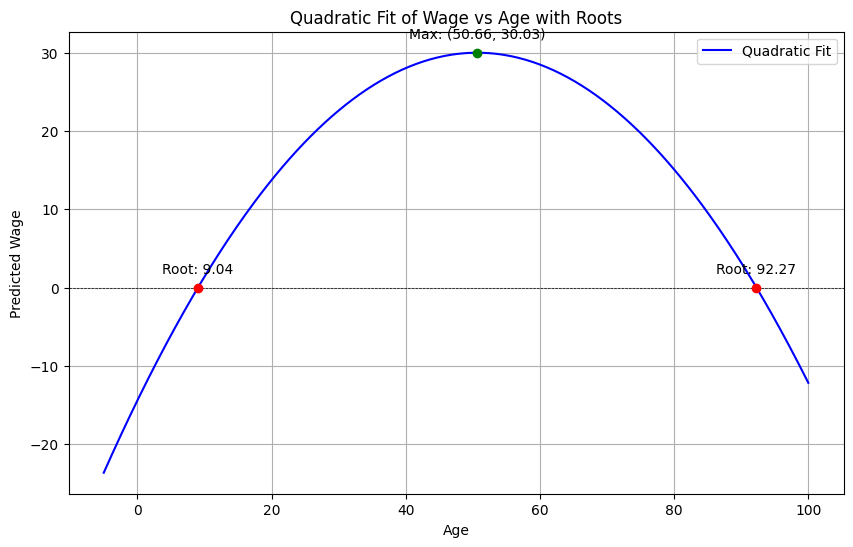

The roots of the quadratic equation are: [9.042055881204288, 92.27185466166878]


In [ ]:


# Solve the quadratic equation
a = slope_age2
b = slope_age
c = intercept

# Calculate the discriminant
discriminant = b**2 - 4*a*c

if discriminant >= 0:
    root1 = (-b + np.sqrt(discriminant)) / (2*a)
    root2 = (-b - np.sqrt(discriminant)) / (2*a)
    roots = [root1, root2]
else:
    roots = []

# Plotting the quadratic curve and the roots
age_values = np.linspace(-5, 100, 400)
wage_predictions = intercept + slope_age * age_values + slope_age2 * (age_values**2)

plt.figure(figsize=(10, 6))
plt.plot(age_values, wage_predictions, label='Quadratic Fit', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

if roots:
    for root in roots:
        plt.plot(root, 0, 'ro')  # Plot the roots on the curve
        plt.annotate(f'Root: {root:.2f}', (root, 0), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Age')
plt.ylabel('Predicted Wage')
plt.title('Quadratic Fit of Wage vs Age with Roots')
plt.legend()

# Find the vertex (maximum point for a downward parabola)
vertex_age = -b / (2 * a)
vertex_wage = intercept + slope_age * vertex_age + slope_age2 * (vertex_age**2)
# Plot the maximum point (vertex)
plt.plot(vertex_age, vertex_wage, 'go')  # Green dot for the maximum point
plt.annotate(f'Max: ({vertex_age:.2f}, {vertex_wage:.2f})', (vertex_age, vertex_wage), textcoords="offset points", xytext=(0,10), ha='center')



plt.grid(True)
plt.show()

print(f"The roots of the quadratic equation are: {roots}")

In [ ]:
# SST and SSR

# Extract observed and predicted values
observedValues = wagesDf["Wage"]
predictedValues = wageAgeModel2Fit.predict(sm.add_constant(wagesDf[["Age", "agePower2"]]))

# Calculate the mean of observed values
mean_observed = np.mean(observedValues)

# Calculate SST
sst = np.sum((observedValues - mean_observed) ** 2)

# Calculate SSR
ssr = np.sum((observedValues - predictedValues) ** 2)

errors = np.sum(( predictedValues - mean_observed) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)
r_squared2 = errors / sst

print(f"SST: {sst}")
print(f"SSR: {ssr}")
print(f"R^2: {r_squared}")
print(f"R^2_2: {r_squared2}")

SST: 4420.060579999999
SSR: 2649.943406820784
R^2: 0.40047350961402794
R^2_2: 0.40047350961401895


In [ ]:
wagesDf.shape

(80, 5)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
trainSet, testSet = train_test_split(wagesDf, test_size=0.15, random_state=800)
# trainSet, testSet = train_test_split(wagesDf, test_size=0.15)

trainSet.head(), trainSet.shape

(     Wage  Educ  Age  agePower2  predictedWage3
 47  13.39    10   27      729.0       20.323818
 36  40.61    18   59     3481.0       28.820685
 5   18.36     8   51     2601.0       30.025546
 65  27.90    15   46     2116.0       29.651553
 11  34.95    22   55     3025.0       29.700539,
 (68, 5))

In [ ]:
wagesDf.shape, trainSet.shape, testSet.shape

((80, 5), (68, 5), (12, 5))

In [ ]:
trainModel = sm.OLS(
  trainSet["Wage"],
  sm.add_constant(trainSet[["Age", "agePower2"]])
)
trainModelFit = trainModel.fit()
print(trainModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     24.18
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.41e-08
Time:                        15:04:49   Log-Likelihood:                -216.27
No. Observations:                  68   AIC:                             438.5
Df Residuals:                      65   BIC:                             445.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.8100      6.037     -2.619      0.0

In [ ]:
print(wageAgeModel2Fit.summary())

In [ ]:
predictedTest = trainModelFit.predict(sm.add_constant(testSet[["Age", "agePower2"]]))
testSet['predictedTest'] = predictedTest
testSet

,Wage,Educ,Age,agePower2,predictedWage3,predictedTest
28,16.37,12,22,484.0,15.788477,15.742293
64,18.28,8,70,4900.0,23.540161,23.156031
57,20.15,10,41,1681.0,28.410612,28.750289
54,33.70,18,62,3844.0,27.796677,27.770654
8,25.60,15,54,2916.0,29.833807,30.045178
72,35.71,18,66,4356.0,25.945842,25.755855
45,26.04,17,36,1296.0,26.302724,26.606873
29,16.97,9,32,1024.0,23.992211,24.233988
44,24.26,20,25,625.0,18.613715,18.673724
73,24.74,14,33,1089.0,24.621856,24.882055


In [ ]:
testSet['error']  = testSet['Wage'] - testSet['predictedTest']
testSet

In [ ]:
# Plot errors
plt.scatter(range(len(testSet['error'])), testSet['error'])
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Plot')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(testSet['Wage'], testSet['predictedTest']))
print("RMSE:", rmse)

In [ ]:
# RMSE with respect to mean of train set wage
meanTrainWage = np.mean(testSet['Wage'])
rmseMean = np.sqrt(mean_squared_error(testSet['Wage'], [meanTrainWage] * len(testSet['Wage'])))
print("RMSE with respect to mean of train set wage:", rmseMean)

In [ ]:
# Lets include Education
trainModel2 = sm.OLS(
  trainSet["Wage"],
  sm.add_constant(trainSet[["Age", "agePower2", "Educ"]])
)
trainModel2Fit = trainModel2.fit()
print(trainModel2Fit.summary())

In [ ]:
predictedTest2 = trainModel2Fit.predict(sm.add_constant(testSet[["Age", "agePower2", "Educ"]]))
testSet['predictedTest2'] = predictedTest2
testSet['error2']  = testSet['Wage'] - testSet['predictedTest2']
testSet


In [ ]:
# Plot errors
plt.scatter(range(len(testSet['error'])), testSet['error'])
plt.scatter(range(len(testSet['error2'])), testSet['error2'])
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Plot')
plt.show()


In [ ]:
rmse2 = np.sqrt(mean_squared_error(testSet['Wage'], testSet['predictedTest2']))
print("RMSE:", rmse)
print("RMSE2:", rmse2)

In [ ]:
print("RMSE with respect to mean of train set wage:", rmseMean)

K-Fold Cross validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=55)


In [ ]:
check = kf.split(wagesDf)
check
experiment = 1
# Loop through each fold
# Initialize variables to store results
mseScores = []
meanMseScores = []
for train_index, val_index in check:
    # Split the data
    trainSet, valSet = wagesDf.iloc[train_index], wagesDf.iloc[val_index]

    # Fit the model
    trainModel = sm.OLS(trainSet["Wage"], sm.add_constant(trainSet[["Age", "agePower2"]]))
    trainModelFit = trainModel.fit()

    # Predict on the validation set
    val_predictions = trainModelFit.predict(sm.add_constant(valSet[["Age", "agePower2"]]))

    # Calculate the mean squared error
    mse = mean_squared_error(valSet["Wage"], val_predictions)
    meanMse = mean_squared_error(valSet["Wage"], [np.mean(valSet["Wage"])] * len(valSet["Wage"]))
    mseScores.append(mse)
    meanMseScores.append(meanMse)

    # Print summary for each fold (optional)
    print(f'expr={experiment}')
    experiment = experiment +1
    print(trainModelFit.summary())

In [ ]:
mseScores,meanMseScores

In [ ]:
rmseScores = np.sqrt(mseScores)
rmeanMseScores = np.sqrt(meanMseScores)
rmseScores,rmeanMseScores

In [ ]:
# Calculate average MSE
averageMse = sum(mseScores) / len(mseScores)
averageMseMean = sum(meanMseScores) / len(mseScores)
print(f"Average MSE across all folds: {averageMse}")
print(f"Average MSE Mean across all folds: {averageMseMean}")
print(f"Average RMSE across all folds: {pow(averageMse, 0.5)}")
print(f"Average RMSE Mean across all folds: {pow(averageMseMean, 0.5)}")